In [37]:
%reload_ext autoreload
%autoreload 2

from PIL import Image, ImageEnhance, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import pdb
import os
import cv2

In [38]:
# Autoaugment package
from PIL import Image, ImageEnhance, ImageOps
import numpy as np
import random


class ImageNetPolicy(object):
    """ Randomly choose one of the best 24 Sub-policies on ImageNet.

        Example:
        >>> policy = ImageNetPolicy()
        >>> transformed = policy(image)

        Example as a PyTorch Transform:
        >>> transform=transforms.Compose([
        >>>     transforms.Resize(256),
        >>>     ImageNetPolicy(),
        >>>     transforms.ToTensor()])
    """
    def __init__(self, fillcolor=(128, 128, 128)):
        self.policies = [
            SubPolicy(0.4, "posterize", 8, 0.6, "rotate", 9, fillcolor),
            SubPolicy(0.6, "solarize", 5, 0.6, "autocontrast", 5, fillcolor),
            SubPolicy(0.8, "equalize", 8, 0.6, "equalize", 3, fillcolor),
            SubPolicy(0.6, "posterize", 7, 0.6, "posterize", 6, fillcolor),
            SubPolicy(0.4, "equalize", 7, 0.2, "solarize", 4, fillcolor),

            SubPolicy(0.4, "equalize", 4, 0.8, "rotate", 8, fillcolor),
            SubPolicy(0.6, "solarize", 3, 0.6, "equalize", 7, fillcolor),
            SubPolicy(0.8, "posterize", 5, 1.0, "equalize", 2, fillcolor),
            SubPolicy(0.2, "rotate", 3, 0.6, "solarize", 8, fillcolor),
            SubPolicy(0.6, "equalize", 8, 0.4, "posterize", 6, fillcolor),

            SubPolicy(0.8, "rotate", 8, 0.4, "color", 0, fillcolor),
            SubPolicy(0.4, "rotate", 9, 0.6, "equalize", 2, fillcolor),
            SubPolicy(0.0, "equalize", 7, 0.8, "equalize", 8, fillcolor),
            SubPolicy(0.6, "invert", 4, 1.0, "equalize", 8, fillcolor),
            SubPolicy(0.6, "color", 4, 1.0, "contrast", 8, fillcolor),

            SubPolicy(0.8, "rotate", 8, 1.0, "color", 2, fillcolor),
            SubPolicy(0.8, "color", 8, 0.8, "solarize", 7, fillcolor),
            SubPolicy(0.4, "sharpness", 7, 0.6, "invert", 8, fillcolor),
            SubPolicy(0.6, "shearX", 5, 1.0, "equalize", 9, fillcolor),
            SubPolicy(0.4, "color", 0, 0.6, "equalize", 3, fillcolor),

            SubPolicy(0.4, "equalize", 7, 0.2, "solarize", 4, fillcolor),
            SubPolicy(0.6, "solarize", 5, 0.6, "autocontrast", 5, fillcolor),
            SubPolicy(0.6, "invert", 4, 1.0, "equalize", 8, fillcolor),
            SubPolicy(0.6, "color", 4, 1.0, "contrast", 8, fillcolor),
            SubPolicy(0.8, "equalize", 8, 0.6, "equalize", 3, fillcolor)
        ]


    def __call__(self, img):
        policy_idx = random.randint(0, len(self.policies) - 1)
        return self.policies[policy_idx](img)

    def __repr__(self):
        return "AutoAugment ImageNet Policy"


class CIFAR10Policy(object):
    """ Randomly choose one of the best 25 Sub-policies on CIFAR10.

        Example:
        >>> policy = CIFAR10Policy()
        >>> transformed = policy(image)

        Example as a PyTorch Transform:
        >>> transform=transforms.Compose([
        >>>     transforms.Resize(256),
        >>>     CIFAR10Policy(),
        >>>     transforms.ToTensor()])
    """
    def __init__(self, fillcolor=(128, 128, 128)):
        self.policies = [
            SubPolicy(0.1, "invert", 7, 0.2, "contrast", 6, fillcolor),
            SubPolicy(0.7, "rotate", 2, 0.3, "translateX", 9, fillcolor),
            SubPolicy(0.8, "sharpness", 1, 0.9, "sharpness", 3, fillcolor),
            SubPolicy(0.5, "shearY", 8, 0.7, "translateY", 9, fillcolor),
            SubPolicy(0.5, "autocontrast", 8, 0.9, "equalize", 2, fillcolor),

            SubPolicy(0.2, "shearY", 7, 0.3, "posterize", 7, fillcolor),
            SubPolicy(0.4, "color", 3, 0.6, "brightness", 7, fillcolor),
            SubPolicy(0.3, "sharpness", 9, 0.7, "brightness", 9, fillcolor),
            SubPolicy(0.6, "equalize", 5, 0.5, "equalize", 1, fillcolor),
            SubPolicy(0.6, "contrast", 7, 0.6, "sharpness", 5, fillcolor),

            SubPolicy(0.7, "color", 7, 0.5, "translateX", 8, fillcolor),
            SubPolicy(0.3, "equalize", 7, 0.4, "autocontrast", 8, fillcolor),
            SubPolicy(0.4, "translateY", 3, 0.2, "sharpness", 6, fillcolor),
            SubPolicy(0.9, "brightness", 6, 0.2, "color", 8, fillcolor),
            SubPolicy(0.5, "solarize", 2, 0.0, "invert", 3, fillcolor),

            SubPolicy(0.2, "equalize", 0, 0.6, "autocontrast", 0, fillcolor),
            SubPolicy(0.2, "equalize", 8, 0.8, "equalize", 4, fillcolor),
            SubPolicy(0.9, "color", 9, 0.6, "equalize", 6, fillcolor),
            SubPolicy(0.8, "autocontrast", 4, 0.2, "solarize", 8, fillcolor),
            SubPolicy(0.1, "brightness", 3, 0.7, "color", 0, fillcolor),

            SubPolicy(0.4, "solarize", 5, 0.9, "autocontrast", 3, fillcolor),
            SubPolicy(0.9, "translateY", 9, 0.7, "translateY", 9, fillcolor),
            SubPolicy(0.9, "autocontrast", 2, 0.8, "solarize", 3, fillcolor),
            SubPolicy(0.8, "equalize", 8, 0.1, "invert", 3, fillcolor),
            SubPolicy(0.7, "translateY", 9, 0.9, "autocontrast", 1, fillcolor)
        ]


    def __call__(self, img):
        policy_idx = random.randint(0, len(self.policies) - 1)
        return self.policies[policy_idx](img)

    def __repr__(self):
        return "AutoAugment CIFAR10 Policy"


class SVHNPolicy(object):
    """ Randomly choose one of the best 25 Sub-policies on SVHN.

        Example:
        >>> policy = SVHNPolicy()
        >>> transformed = policy(image)

        Example as a PyTorch Transform:
        >>> transform=transforms.Compose([
        >>>     transforms.Resize(256),
        >>>     SVHNPolicy(),
        >>>     transforms.ToTensor()])
    """
    def __init__(self, fillcolor=(128, 128, 128)):
        self.policies = [
            SubPolicy(0.9, "shearX", 4, 0.2, "invert", 3, fillcolor),
            SubPolicy(0.9, "shearY", 8, 0.7, "invert", 5, fillcolor),
            SubPolicy(0.6, "equalize", 5, 0.6, "solarize", 6, fillcolor),
            SubPolicy(0.9, "invert", 3, 0.6, "equalize", 3, fillcolor),
            SubPolicy(0.6, "equalize", 1, 0.9, "rotate", 3, fillcolor),

            SubPolicy(0.9, "shearX", 4, 0.8, "autocontrast", 3, fillcolor),
            SubPolicy(0.9, "shearY", 8, 0.4, "invert", 5, fillcolor),
            SubPolicy(0.9, "shearY", 5, 0.2, "solarize", 6, fillcolor),
            SubPolicy(0.9, "invert", 6, 0.8, "autocontrast", 1, fillcolor),
            SubPolicy(0.6, "equalize", 3, 0.9, "rotate", 3, fillcolor),

            SubPolicy(0.9, "shearX", 4, 0.3, "solarize", 3, fillcolor),
            SubPolicy(0.8, "shearY", 8, 0.7, "invert", 4, fillcolor),
            SubPolicy(0.9, "equalize", 5, 0.6, "translateY", 6, fillcolor),
            SubPolicy(0.9, "invert", 4, 0.6, "equalize", 7, fillcolor),
            SubPolicy(0.3, "contrast", 3, 0.8, "rotate", 4, fillcolor),

            SubPolicy(0.8, "invert", 5, 0.0, "translateY", 2, fillcolor),
            SubPolicy(0.7, "shearY", 6, 0.4, "solarize", 8, fillcolor),
            SubPolicy(0.6, "invert", 4, 0.8, "rotate", 4, fillcolor),
            SubPolicy(0.3, "shearY", 7, 0.9, "translateX", 3, fillcolor),
            SubPolicy(0.1, "shearX", 6, 0.6, "invert", 5, fillcolor),

            SubPolicy(0.7, "solarize", 2, 0.6, "translateY", 7, fillcolor),
            SubPolicy(0.8, "shearY", 4, 0.8, "invert", 8, fillcolor),
            SubPolicy(0.7, "shearX", 9, 0.8, "translateY", 3, fillcolor),
            SubPolicy(0.8, "shearY", 5, 0.7, "autocontrast", 3, fillcolor),
            SubPolicy(0.7, "shearX", 2, 0.1, "invert", 5, fillcolor)
        ]


    def __call__(self, img):
        policy_idx = random.randint(0, len(self.policies) - 1)
        return self.policies[policy_idx](img)

    def __repr__(self):
        return "AutoAugment SVHN Policy"


class SubPolicy(object):
    def __init__(self, p1, operation1, magnitude_idx1, p2, operation2, magnitude_idx2, fillcolor=(128, 128, 128)):
        ranges = {
            "shearX": np.linspace(0, 0.3, 10),
            "shearY": np.linspace(0, 0.3, 10),
            "translateX": np.linspace(0, 150 / 331, 10),
            "translateY": np.linspace(0, 150 / 331, 10),
            "rotate": np.linspace(0, 30, 10),
            "color": np.linspace(0.0, 0.9, 10),
            "posterize": np.round(np.linspace(8, 4, 10), 0).astype(np.int),
            "solarize": np.linspace(256, 0, 10),
            "contrast": np.linspace(0.0, 0.9, 10),
            "sharpness": np.linspace(0.0, 0.9, 10),
            "brightness": np.linspace(0.0, 0.9, 10),
            "autocontrast": [0] * 10,
            "equalize": [0] * 10,
            "invert": [0] * 10
        }

        # from https://stackoverflow.com/questions/5252170/specify-image-filling-color-when-rotating-in-python-with-pil-and-setting-expand
        def rotate_with_fill(img, magnitude):
            rot = img.convert("RGBA").rotate(magnitude)
            return Image.composite(rot, Image.new("RGBA", rot.size, (128,) * 4), rot).convert(img.mode)

        func = {
            "shearX": lambda img, magnitude: img.transform(
                img.size, Image.AFFINE, (1, magnitude * random.choice([-1, 1]), 0, 0, 1, 0),
                Image.BICUBIC, fillcolor=fillcolor),
            "shearY": lambda img, magnitude: img.transform(
                img.size, Image.AFFINE, (1, 0, 0, magnitude * random.choice([-1, 1]), 1, 0),
                Image.BICUBIC, fillcolor=fillcolor),
            "translateX": lambda img, magnitude: img.transform(
                img.size, Image.AFFINE, (1, 0, magnitude * img.size[0] * random.choice([-1, 1]), 0, 1, 0),
                fillcolor=fillcolor),
            "translateY": lambda img, magnitude: img.transform(
                img.size, Image.AFFINE, (1, 0, 0, 0, 1, magnitude * img.size[1] * random.choice([-1, 1])),
                fillcolor=fillcolor),
            "rotate": lambda img, magnitude: rotate_with_fill(img, magnitude),
            # "rotate": lambda img, magnitude: img.rotate(magnitude * random.choice([-1, 1])),
            "color": lambda img, magnitude: ImageEnhance.Color(img).enhance(1 + magnitude * random.choice([-1, 1])),
            "posterize": lambda img, magnitude: ImageOps.posterize(img, magnitude),
            "solarize": lambda img, magnitude: ImageOps.solarize(img, magnitude),
            "contrast": lambda img, magnitude: ImageEnhance.Contrast(img).enhance(
                1 + magnitude * random.choice([-1, 1])),
            "sharpness": lambda img, magnitude: ImageEnhance.Sharpness(img).enhance(
                1 + magnitude * random.choice([-1, 1])),
            "brightness": lambda img, magnitude: ImageEnhance.Brightness(img).enhance(
                1 + magnitude * random.choice([-1, 1])),
            "autocontrast": lambda img, magnitude: ImageOps.autocontrast(img),
            "equalize": lambda img, magnitude: ImageOps.equalize(img),
            "invert": lambda img, magnitude: ImageOps.invert(img)
        }

        # self.name = "{}_{:.2f}_and_{}_{:.2f}".format(
        #     operation1, ranges[operation1][magnitude_idx1],
        #     operation2, ranges[operation2][magnitude_idx2])
        self.p1 = p1
        self.operation1 = func[operation1]
        self.magnitude1 = ranges[operation1][magnitude_idx1]
        self.p2 = p2
        self.operation2 = func[operation2]
        self.magnitude2 = ranges[operation2][magnitude_idx2]


    def __call__(self, img):
        if random.random() < self.p1: img = self.operation1(img, self.magnitude1)
        if random.random() < self.p2: img = self.operation2(img, self.magnitude2)
        return img

In [39]:
!pwd

/Users/sebastian/git_repos/data_science/ship_detection/ship-detection-challenge/augmentation


# Test ImageNet Policy

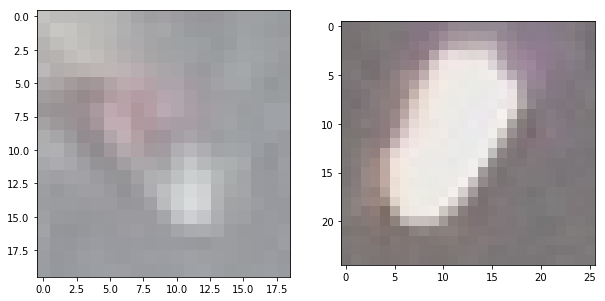

In [40]:
img = Image.open("/Users/sebastian/git_repos/data_science/ship_detection/ship-detection-challenge/train_images/6068.png")
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))
ax1.imshow(img)
img2 = Image.open("/Users/sebastian/git_repos/data_science/ship_detection/ship-detection-challenge/train_images/1094.png")
ax2.imshow(img2)
plt.show()

In [41]:
def show_sixteen(images, titles=0):
    f, axarr = plt.subplots(4, 4, figsize=(15, 15), gridspec_kw={"wspace": 0, "hspace": 0})
    for idx, ax in enumerate(f.axes):
        ax.imshow(images[idx])
        ax.axis("off")
        if titles: ax.set_title(titles[idx])
    plt.show()

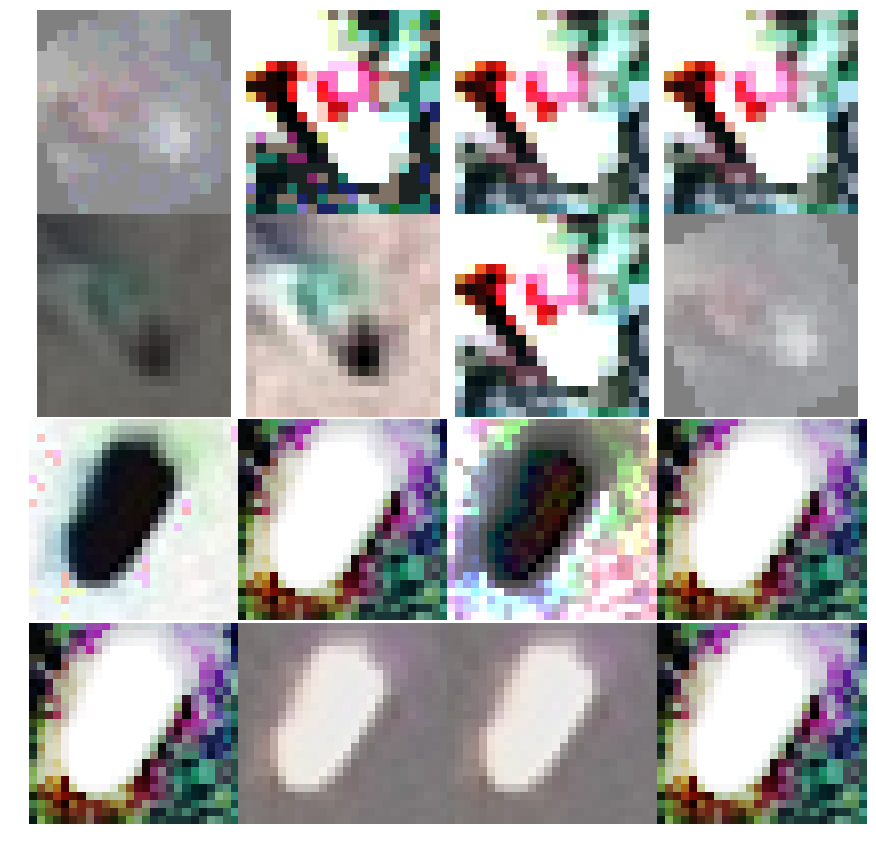

<PIL.Image.Image image mode=RGB size=19x20 at 0x126844780>


In [42]:
policy = ImageNetPolicy()

imgs = []
for _ in range(8): imgs.append(policy(img))
for _ in range(8): imgs.append(policy(img2))
show_sixteen(imgs)
print(imgs[0])

In [43]:
import cv2
import time

def load_images(data_dir,resize=None):
    img_list = []
    filenames = os.listdir(data_dir)
    for filename in filenames:
        img_raw = Image.open("/Users/sebastian/git_repos/data_science/ship_detection/ship-detection-challenge/train_images/"+filename)
        img_list.append(img_raw)
        time.sleep(0.1)

    images = img_list
    return images
  
train_dir = '/Users/sebastian/git_repos/data_science/ship_detection/ship-detection-challenge/train_images/'
train_imgs = load_images(train_dir)

In [44]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder

data = ImageFolder("/Users/sebastian/git_repos/data_science/ship_detection/ship-detection-challenge/train_images/", transform=transforms.Compose(
                        [transforms.Resize(256), 
                         ImageNetPolicy(), 
                         transforms.ToTensor()]))
loader = DataLoader(train_imgs, batch_size=1)

In [34]:
imgs, count = [], 0
count = 0
for _ in range(10):
    for img in loader:
        img = np.transpose(img[0][0].numpy()*255, (1,2,0)).astype(np.uint8)
        imgs.append(img)
        count += 1
        if count==16: 
            show_sixteen(imgs)
            imgs, count = [], 0

TypeError: batch must contain tensors, numbers, dicts or lists; found <class 'PIL.JpegImagePlugin.JpegImageFile'>

# Test CIFAR 10 Policy

In [78]:
data_dir = "/Users/sebastian/git_repos/data_science/ship_detection/ship-detection-challenge/train_images/"
filenames = os.listdir(data_dir)
imgs = []
for filename in filenames:
    img = Image.open(data_dir + filename)
    print(img)
    policy = CIFAR10Policy()
    aug_imgs = []

    for _ in range(32): aug_imgs.append(policy(img))
    imgs.append(aug_imgs)


<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x399 at 0x1271171D0>
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=26x25 at 0x1276F92B0>
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=19x20 at 0x1276F9EB8>


In [81]:
imgs

[[<PIL.Image.Image image mode=RGB size=640x399 at 0x126BF6B38>,
  <PIL.Image.Image image mode=RGB size=640x399 at 0x126BF6DD8>,
  <PIL.Image.Image image mode=RGB size=640x399 at 0x126BF6550>,
  <PIL.Image.Image image mode=RGB size=640x399 at 0x126BF6C18>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x399 at 0x1271171D0>,
  <PIL.Image.Image image mode=RGB size=640x399 at 0x126BF6C50>,
  <PIL.Image.Image image mode=RGB size=640x399 at 0x126BF6588>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x399 at 0x1271171D0>,
  <PIL.Image.Image image mode=RGB size=640x399 at 0x126BF6400>,
  <PIL.Image.Image image mode=RGB size=640x399 at 0x126BF6908>,
  <PIL.Image.Image image mode=RGB size=640x399 at 0x126BF64E0>,
  <PIL.Image.Image image mode=RGB size=640x399 at 0x126BF61D0>,
  <PIL.Image.Image image mode=RGB size=640x399 at 0x126BF6128>,
  <PIL.Image.Image image mode=RGB size=640x399 at 0x127117128>,
  <PIL.Image.Image image mode=RGB size=640x399 at 0x126BF6710>,
  <P

In [51]:
def show_sixteen(images, titles=0):
    f, axarr = plt.subplots(4, 4, figsize=(15, 15), gridspec_kw={"wspace": 0, "hspace": 0})
    for idx, ax in enumerate(f.axes):
        ax.imshow(images[idx])
        ax.axis("off")
        if titles: ax.set_title(titles[idx])
    plt.show()

[<PIL.Image.Image image mode=RGB size=19x20 at 0x1147181D0>, <PIL.Image.Image image mode=RGB size=19x20 at 0x1277D2BA8>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=19x20 at 0x1268A4438>, <PIL.Image.Image image mode=RGB size=19x20 at 0x1277D2AC8>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=19x20 at 0x1268A4438>, <PIL.Image.Image image mode=RGB size=19x20 at 0x1277D25F8>, <PIL.Image.Image image mode=RGB size=19x20 at 0x114718EB8>, <PIL.Image.Image image mode=RGB size=19x20 at 0x12783D710>, <PIL.Image.Image image mode=RGB size=19x20 at 0x12783D9E8>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=19x20 at 0x1268A4438>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=19x20 at 0x1268A4438>, <PIL.Image.Image image mode=RGB size=19x20 at 0x12783D128>, <PIL.Image.Image image mode=RGB size=19x20 at 0x127800E80>, <PIL.Image.Image image mode=RGB size=19x20 at 0x127800278>, <PIL.Image.Image image mode=RGB size=19x20 at 0x12783D828>, <PIL.Image.Image image mode=RGB siz

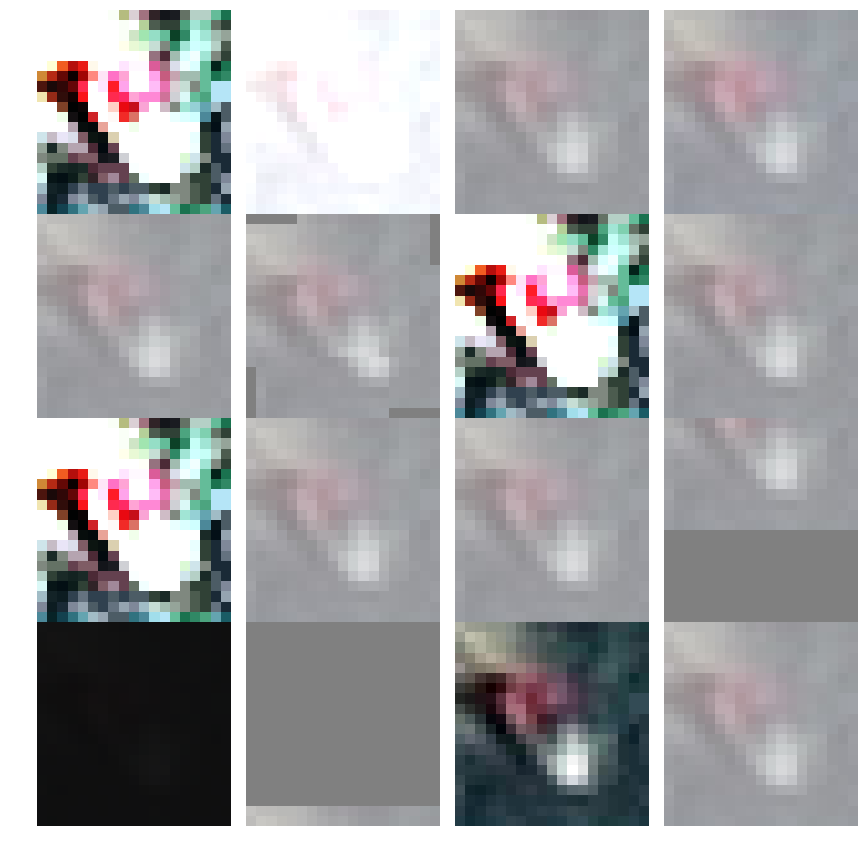

In [54]:
policy = CIFAR10Policy()

imgs = []
for _ in range(32): imgs.append(policy(img))


In [ ]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder

data = ImageFolder("data/cifar_data", transform=transforms.Compose([
    CIFAR10Policy(), 
    transforms.ToTensor(),
]))
loader = DataLoader(data, batch_size=1)

In [ ]:
imgs, count = [], 0
for _ in range(10):
    for img_ in loader:
        img_ = np.transpose(img_[0][0].numpy()*255, (1,2,0)).astype(np.uint8)
        imgs.append(img_)
        count += 1
        if count==16: 
            show_sixteen(imgs)
            imgs, count = [], 0

# Test SVHN Policy

In [ ]:
img = Image.open("images/svhn_1.png")
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))
ax1.imshow(img)
img2 = Image.open("images/svhn_2.png")
ax2.imshow(img2)
plt.show()

In [ ]:
def show_sixteen(images, titles=0):
    f, axarr = plt.subplots(4, 4, figsize=(15, 15), gridspec_kw={"wspace": 0, "hspace": 0})
    for idx, ax in enumerate(f.axes):
        ax.imshow(images[idx])
        ax.axis("off")
        if titles: ax.set_title(titles[idx])
    plt.show()

In [ ]:
policy = SVHNPolicy()

imgs = []
for _ in range(8): imgs.append(policy(img))
for _ in range(8): imgs.append(policy(img2))
show_sixteen(imgs)

In [ ]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder

data = ImageFolder("data/svhn_data", transform=transforms.Compose([
    SVHNPolicy(), 
    transforms.ToTensor(),
]))
loader = DataLoader(data, batch_size=1)

In [ ]:
imgs, count = [], 0
for _ in range(10):
    for img_ in loader:
        img_ = np.transpose(img_[0][0].numpy()*255, (1,2,0)).astype(np.uint8)
        imgs.append(img_)
        count += 1
        if count==16: 
            show_sixteen(imgs)
            imgs, count = [], 0

# Examples of augmentations and ranges used in the ImageNet Policy

The ImageNet policy is only using 7 out of 16 possible image operations, focusing on color-based transformations and rotations.

In [ ]:
ranges = {
            "shearX": np.linspace(0, 0.3, 10),
            "shearY": np.linspace(0, 0.3, 10),
            "translateX": np.linspace(0, 150 / 331, 10),
            "translateY": np.linspace(0, 150 / 331, 10),
            "rotate": np.linspace(0, 30, 10),
            "color": np.linspace(0.0, 0.9, 10),
            "posterize": np.round(np.linspace(8, 4, 10), 0).astype(np.int),
            "solarize": np.linspace(256, 0, 10),
            "contrast": np.linspace(0.0, 0.9, 10),
            "sharpness": np.linspace(0.0, 0.9, 10),
            "brightness": np.linspace(0.0, 0.9, 10),
            "autocontrast": [0] * 10,
            "equalize": [0] * 10,
            "invert": [0] * 10
        }

In [ ]:
img = Image.open("Cat03.jpg")
img = img.resize((300, 300))
# img

## Helper functions

In [ ]:
def show_enhanced_and_original(enhanced_img, titles=0):
    f, axarr = plt.subplots(1, 2, figsize=(10, 6))
    axarr[0].imshow(img)
    axarr[0].axis("off")
    axarr[0].set_title(titles[0])
    axarr[1].imshow(enhanced_img)
    axarr[1].axis("off")
    axarr[1].set_title(titles[1])
    plt.show()

def show_three_magnitutes_and_original(images, titles=0):
    f, axarr = plt.subplots(1, 4, figsize=(20, 10))
    for idx, ax in enumerate(axarr):
        if idx==0: ax.imshow(img)
        else: ax.imshow(images[idx-1])
        ax.axis("off")
        if titles: ax.set_title(titles[idx])
    plt.show()

## Augmentations

In [ ]:
def rotate_with_fill(img, magnitude):
    im2 = img.convert("RGBA")
    rot = im2.rotate(magnitude)
    fff = Image.new("RGBA", rot.size, (128,) * 4)
    out = Image.composite(rot, fff, rot)
    return out.convert(img.mode)

enhance_key = "rotate"
show_three_magnitutes_and_original(
    images=[rotate_with_fill(img, ranges[enhance_key][3] * random.choice([-1, 1])), 
            rotate_with_fill(img, ranges[enhance_key][6] * random.choice([-1, 1])), 
            rotate_with_fill(img, ranges[enhance_key][9] * random.choice([-1, 1]))], 
    titles=["ROTATION", "{:.1f} DEGREES".format(ranges[enhance_key][3]), 
            "{:.1f} DEGREES".format(ranges[enhance_key][6]), 
            "{:.1f} DEGREES".format(ranges[enhance_key][9])])

In [ ]:
enhance_key = "color"
enhancer = ImageEnhance.Color(img)
show_three_magnitutes_and_original(
    images=[enhancer.enhance(1 + ranges[enhance_key][3] * random.choice([-1, 1])), 
            enhancer.enhance(1 + ranges[enhance_key][6] * random.choice([-1, 1])), 
            enhancer.enhance(1 + ranges[enhance_key][9] * random.choice([-1, 1]))],
    titles=["ADJUST COLOR BALANCE", "{:.1f} MAGNITUDE".format(ranges[enhance_key][3]), 
            "{:.1f} MAGNITUDE".format(ranges[enhance_key][6]), 
            "{:.1f} MAGNITUDE".format(ranges[enhance_key][9])])

In [ ]:
enhance_key = "sharpness"
enhancer = ImageEnhance.Sharpness(img)
show_three_magnitutes_and_original(
    images=[enhancer.enhance(1 + ranges[enhance_key][3] * random.choice([-1, 1])), 
            enhancer.enhance(1 + ranges[enhance_key][6] * random.choice([-1, 1])), 
            enhancer.enhance(1 + ranges[enhance_key][9] * random.choice([-1, 1]))],
    titles=["ADJUST SHARPNESS", "{:.1f} MAGNITUDE".format(ranges[enhance_key][3]),
            "{:.1f} MAGNITUDE".format(ranges[enhance_key][6]), 
            "{:.1f} MAGNITUDE".format(ranges[enhance_key][9])])

In [ ]:
enhance_key = "contrast"
enhancer = ImageEnhance.Contrast(img)
show_three_magnitutes_and_original(
    images=[enhancer.enhance(1 + ranges[enhance_key][3] * random.choice([-1, 1])),
            enhancer.enhance(1 + ranges[enhance_key][6] * random.choice([-1, 1])), 
            enhancer.enhance(1 + ranges[enhance_key][9] * random.choice([-1, 1]))],
    titles=["ADJUST CONTRAST", "{:.1f} MAGNITUDE".format(ranges[enhance_key][3]),
            "{:.1f} MAGNITUDE".format(ranges[enhance_key][6]), 
            "{:.1f} MAGNITUDE".format(ranges[enhance_key][9])])

In [ ]:
img_enhanced = ImageOps.autocontrast(img) # remaps darkest pixel to 0 and lightest to 255
show_enhanced_and_original(img_enhanced, titles=["AUTOCONTRAST OFF", "AUTOCONTRAST ON"])

In [ ]:
img_enhanced = ImageOps.equalize(img) # equalizes the color histogram
show_enhanced_and_original(img_enhanced, titles=["EQUALIZE OFF", "EQUALIZE ON"])

In [ ]:
img_enhanced = ImageOps.invert(img) # inverts the pixel values, e.g. 55 --> 200
show_enhanced_and_original(img_enhanced, titles=["INVERT OFF", "INVERT ON"])

In [ ]:
# reduces the number of bits for each color channel
enhance_key = "posterize"
show_three_magnitutes_and_original(
    images=[ImageOps.posterize(img, ranges[enhance_key][3]) ,
            ImageOps.posterize(img, ranges[enhance_key][6]) ,
            ImageOps.posterize(img, ranges[enhance_key][9])],
    titles=["POSTERIZE: REDUCE NUMBER OF BITS", "{:.0f} BITS".format(ranges[enhance_key][3]),
            "{:.0f} BITS".format(ranges[enhance_key][6]), 
            "{:.0f} BITS".format(ranges[enhance_key][9])])

In [ ]:
# inverts all pixel values above a threshold
enhance_key = "solarize"
show_three_magnitutes_and_original(
    images=[ImageOps.solarize(img, ranges[enhance_key][3]), 
            ImageOps.solarize(img, ranges[enhance_key][6]), 
            ImageOps.solarize(img, ranges[enhance_key][9])],
    titles=["SOLARIZE: INVERT PIXELS ABOVE THRESHOLD", 
            "{:.0f} THRESHOLD".format(ranges[enhance_key][3]), 
            "{:.0f} THRESHOLD".format(ranges[enhance_key][6]), 
            "{:.0f} THRESHOLD".format(ranges[enhance_key][9])])

In [ ]:
def shear_x(img, magnitude):
    return img.transform(
        img.size, Image.AFFINE, (1, magnitude * random.choice([-1, 1]), 0, 0, 1, 0),
        Image.BICUBIC, fillcolor=(128, 128, 128))

# shear the image along the horizontal axis
enhance_key = "shearX"
show_three_magnitutes_and_original(
    images=[shear_x(img, ranges[enhance_key][3]),
            shear_x(img, ranges[enhance_key][6]),
            shear_x(img, ranges[enhance_key][9])],
    titles=["SHEAR_X", "{:.1f} MAGNITUDE".format(ranges[enhance_key][3]),
            "{:.1f} MAGNITUDE".format(ranges[enhance_key][6]), 
            "{:.1f} MAGNITUDE".format(ranges[enhance_key][9])])

# Examples of augmentations and ranges used in the CIFAR10 but not in the ImageNet Policy

In [ ]:
img = Image.open("horse_cifar10.png")

In [ ]:
def translate_x(img, magnitude):
    return img.transform(
        img.size, Image.AFFINE, (1, 0, magnitude * img.size[0] * random.choice([-1, 1]), 0, 1, 0),
        fillcolor=(128, 128, 128))

enhance_key = "translateX"
show_three_magnitutes_and_original(
    images=[translate_x(img, ranges[enhance_key][3]), 
            translate_x(img, ranges[enhance_key][6]), 
            translate_x(img, ranges[enhance_key][9])], 
    titles=["TRANSLATE_X", "{:.1f} PIXELS".format(ranges[enhance_key][3]*img.size[0]), 
            "{:.1f} PIXELS".format(ranges[enhance_key][6]*img.size[0]), 
            "{:.1f} PIXELS".format(ranges[enhance_key][9]*img.size[0])])

In [ ]:
def translate_y(img, magnitude):
    return img.transform(
        img.size, Image.AFFINE, (1, 0, 0, 0, 1, magnitude * img.size[0] * random.choice([-1, 1])),
        fillcolor=(128, 128, 128))

enhance_key = "translateY"
show_three_magnitutes_and_original(
    images=[translate_y(img, ranges[enhance_key][3]), 
            translate_y(img, ranges[enhance_key][6]), 
            translate_y(img, ranges[enhance_key][9])],  
    titles=["TRANSLATE_Y", "{:.1f} PIXELS".format(ranges[enhance_key][3]*img.size[1]), 
            "{:.1f} PIXELS".format(ranges[enhance_key][6]*img.size[1]), 
            "{:.1f} PIXELS".format(ranges[enhance_key][9]*img.size[1])])

In [ ]:
def shear_y(img, magnitude):
    return img.transform(
        img.size, Image.AFFINE, (1, 0, 0, magnitude * random.choice([-1, 1]), 1, 0),
        Image.BICUBIC, fillcolor=(128, 128, 128))

# shear the image along the horizontal axis
enhance_key = "shearY"
show_three_magnitutes_and_original(
    images=[shear_y(img, ranges[enhance_key][3]),
            shear_y(img, ranges[enhance_key][6]),
            shear_y(img, ranges[enhance_key][9])],
    titles=["SHEAR_Y", "{:.1f} MAGNITUDE".format(ranges[enhance_key][3]),
            "{:.1f} MAGNITUDE".format(ranges[enhance_key][6]), 
            "{:.1f} MAGNITUDE".format(ranges[enhance_key][9])])

In [ ]:
enhance_key = "brightness"
enhancer = ImageEnhance.Brightness(img)
show_three_magnitutes_and_original(
    images=[enhancer.enhance(1 + ranges[enhance_key][3] * random.choice([-1, 1])),
            enhancer.enhance(1 + ranges[enhance_key][6] * random.choice([-1, 1])), 
            enhancer.enhance(1 + ranges[enhance_key][9] * random.choice([-1, 1]))],
    titles=["ADJUST BRIGHTNESS", "{:.1f} MAGNITUDE".format(ranges[enhance_key][3]),
            "{:.1f} MAGNITUDE".format(ranges[enhance_key][6]), 
            "{:.1f} MAGNITUDE".format(ranges[enhance_key][9])])

# Speed Tests with pillow and pillow-simd: Not much of a difference

In [ ]:
ranges = {
    "shearX": np.linspace(0, 0.3, 10),
    "shearY": np.linspace(0, 0.3, 10),
    "translateX": np.linspace(0, 150 / 331, 10),
    "translateY": np.linspace(0, 150 / 331, 10),
    "rotate": np.linspace(0, 30, 10),
    "color": np.linspace(0.0, 0.9, 10),
    "posterize": np.round(np.linspace(8, 4, 10), 0).astype(np.int),
    "solarize": np.linspace(256, 0, 10),
    "contrast": np.linspace(0.0, 0.9, 10),
    "sharpness": np.linspace(0.0, 0.9, 10),
    "brightness": np.linspace(0.0, 0.9, 10),
    "autocontrast": [0] * 10,
    "equalize": [0] * 10,
    "invert": [0] * 10
}

func = {
    "shearX": lambda img, magnitude: img.transform(
        img.size, Image.AFFINE, (1, magnitude * random.choice([-1, 1]), 0, 0, 1, 0),
        Image.BICUBIC, fillcolor=(128, 128, 128)),
    "shearY": lambda img, magnitude: img.transform(
        img.size, Image.AFFINE, (1, 0, 0, magnitude * random.choice([-1, 1]), 1, 0),
        Image.BICUBIC, fillcolor=(128, 128, 128)),
    "translateX": lambda img, magnitude: img.transform(
        img.size, Image.AFFINE, (1, 0, magnitude * img.size[0] * random.choice([-1, 1]), 0, 1, 0),
        fillcolor=(128, 128, 128)),
    "translateY": lambda img, magnitude: img.transform(
        img.size, Image.AFFINE, (1, 0, 0, 0, 1, magnitude * img.size[1] * random.choice([-1, 1])),
        fillcolor=(128, 128, 128)),
    "rotate": lambda img, magnitude: img.rotate(magnitude * random.choice([-1, 1])),
    "color": lambda img, magnitude: ImageEnhance.Color(img).enhance(1 + magnitude * random.choice([-1, 1])),
    "posterize": lambda img, magnitude: ImageOps.posterize(img, magnitude),
    "solarize": lambda img, magnitude: ImageOps.solarize(img, magnitude),
    "contrast": lambda img, magnitude: ImageEnhance.Contrast(img).enhance(
        1 + magnitude * random.choice([-1, 1])),
    "sharpness": lambda img, magnitude: ImageEnhance.Sharpness(img).enhance(
        1 + magnitude * random.choice([-1, 1])),
    "brightness": lambda img, magnitude: ImageEnhance.Brightness(img).enhance(
        1 + magnitude * random.choice([-1, 1])),
    "autocontrast": lambda img, magnitude: ImageOps.autocontrast(img),
    "equalize": lambda img, magnitude: ImageOps.equalize(img),
    "invert": lambda img, magnitude: ImageOps.invert(img)
}

In [ ]:
img = Image.open("Cat02.jpg")
img = img.resize((int(img.size[0]/2), int(img.size[1]/2)), Image.BICUBIC)

## Speed with pillow-5.1.0 installed with "pip install pillow"

In [ ]:
import PIL
PIL.__version__

In [ ]:
%timeit func["shearX"](img, ranges["shearX"][2])

In [ ]:
%timeit func["translateY"](img, ranges["translateY"][2])

In [ ]:
%timeit func["contrast"](img, ranges["contrast"][2])

In [ ]:
%timeit func["equalize"](img, ranges["equalize"][2])

In [ ]:
%timeit func["invert"](img, ranges["invert"][2])

## Speed with pillow-simd-5.1.1.post0 installed with "pip install pillow-simd"

In [ ]:
import PIL
PIL.__version__

In [ ]:
%timeit func["shearX"](img, ranges["shearX"][2])

In [ ]:
%timeit func["translateY"](img, ranges["translateY"][2])

In [ ]:
%timeit func["contrast"](img, ranges["contrast"][2])

In [ ]:
%timeit func["equalize"](img, ranges["equalize"][2])

In [ ]:
%timeit func["invert"](img, ranges["invert"][2])

# Speed tests for new vs. old rotate
- 5-6 times slower

In [ ]:
def rotate_with_fill(img, magnitude):
    rot = img.convert("RGBA").rotate(magnitude)
    return Image.composite(rot, Image.new("RGBA", rot.size, (128,) * 4), rot).convert(img.mode)

In [ ]:
%timeit rotate_with_fill(img, ranges["rotate"][2])

In [ ]:
%timeit img.rotate(ranges["rotate"][2])